In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Import Trento outputs for 60,000 fluctuating events of PbPb collisions at 5.02 TeV with JETSCAPE MAP parameters


In [2]:
trento_out = np.fromfile('jail/trento_MAP_grad.txt', sep=' ')

In [3]:
trento_out = trento_out.reshape(-1,8)

In [4]:
trento_out_df = pd.DataFrame(trento_out,columns=['event_number', 'impact_param', 'npart', 'mult', 'e2',
                                                 'e3', 'R2', 'e5'])

In [5]:
trento_out_df

,event_number,impact_param,npart,mult,e2,e3,R2,e5
0,0.0,3.290214,386.0,2911.424996,0.037484,0.087809,1782.730789,0.046066
1,1.0,16.190109,3.0,7.041557,0.030173,0.002350,232.706705,0.000508
2,2.0,13.471227,38.0,170.890142,0.251493,0.230449,655.897686,0.084126
3,3.0,5.706900,337.0,2367.389614,0.192416,0.149019,1918.883208,0.221796
4,4.0,14.563110,35.0,189.568302,0.483159,0.110692,931.050563,0.036610
...,...,...,...,...,...,...,...,...
48420,48420.0,16.157558,8.0,14.908780,0.265048,0.117378,403.314130,0.062747
48421,48421.0,12.194000,72.0,403.454539,0.271690,0.062728,836.525829,0.104988
48422,48422.0,1.714739,407.0,3127.251323,0.067367,0.006371,1943.764694,0.139949
48423,48423.0,12.071613,78.0,489.984527,0.365883,0.137152,718.290562,0.179616


### Find multiplicity observables by sorting the Trento outputs with integrated reduced thickness

In [6]:
trento_out_df_sorted = trento_out_df.sort_values(by='mult', axis=0, ignore_index=True, ascending=False)

In [7]:
trento_out_df_sorted

,event_number,impact_param,npart,mult,e2,e3,R2,e5
0,31150.0,0.723575,411.0,4166.188039,0.051853,0.058211,1839.133078,0.096781
1,17015.0,1.830649,411.0,3956.343607,0.057293,0.027614,1847.153808,0.057223
2,33984.0,0.819477,412.0,3941.737196,0.079840,0.038797,1870.726569,0.045240
3,34947.0,0.174594,413.0,3819.286342,0.087726,0.078555,2171.210960,0.035321
4,27371.0,1.230981,412.0,3801.392359,0.128290,0.086435,2025.771720,0.063958
...,...,...,...,...,...,...,...,...
48420,16175.0,19.538171,2.0,0.021068,0.104968,0.005132,240.915716,0.002732
48421,573.0,17.176227,2.0,0.017705,0.092109,0.018762,242.906978,0.001183
48422,35834.0,17.073907,2.0,0.007402,0.070275,0.005401,225.431829,0.010011
48423,11499.0,18.836044,2.0,0.006681,0.070786,0.007427,225.912663,0.010411


/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'b')

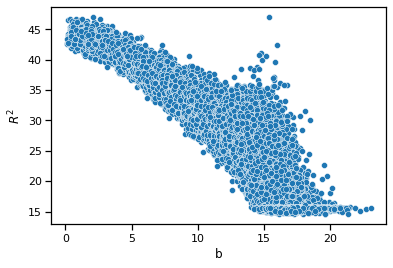

In [8]:
sns.set_context('notebook')
x = trento_out_df_sorted['impact_param']
y = np.sqrt(trento_out_df_sorted['R2'])


ax=sns.scatterplot(x,y)
ax.set_ylabel(r'$R^2$')
ax.set_xlabel('b')

### Calculate $\rho$ for each centrality class

In [9]:
cent_classe = [[0,10],[10,20],[20,30],[30,40],[40,50],[50,60],[60,70],[70,80]]

In [10]:
num_events = len(trento_out_df_sorted)
# We can find event centrality this way
# becausee the events were minimum biased.
event_cen = []

for cen_min, cen_max in cent_classe:
    #print(cen_min,cen_max)
    if cen_min==0:
        n_min=0
    n_max = int(np.floor(num_events * cen_max/100))
    event_cen.append([n_min,n_max])
    n_min = n_max+1
print('Event index ranges corresponding to centralities are as follows')
print(event_cen)

Event index ranges corresponding to centralities are as follows
[[0, 4842], [4843, 9685], [9686, 14527], [14528, 19370], [19371, 24212], [24213, 29055], [29056, 33897], [33898, 38740]]


In [21]:
def calculate_rho(pT_method=0):
    """Calculate rho as a function of centrality using the choosen method to calculate a psuedo observable for pT
    pT_method=0
    -----------
    Calculate pT assuming it's inversely propotional to the integrated reduced thickness function (multiplicity)
    pT_method=1:
    -----------
    Calculate pT assuming it's inversely propotional to the squre root of the integrated reduced
    thickness function (multiplicity)
    pT_method=2:
    Calculate pT assuming it's propotional to the impact parameter
    -----------
    pT_method=3:
    Calculate pT using R^2 value that Trento outputs acording to Giuliano GIACALONE thesis
    Return : 1D array of calculate rho parameter values"""
    
    
    rho = []
    for n_min, n_max in event_cen:
        v2 = np.square(trento_out_df_sorted['e2'][n_min:n_max])
        if pT_method==0:
            pT = np.divide(1,trento_out_df_sorted['mult'][n_min:n_max])
        if pT_method==1:
            pT = np.divide(1,np.sqrt(trento_out_df_sorted['mult'][n_min:n_max]))
        if pT_method==2:
            pT = trento_out_df_sorted['impact_param'][n_min:n_max]
        if pT_method==3:
            pT = np.divide(1,np.sqrt(trento_out_df_sorted['R2'][n_min:n_max]))
        X = np.vstack((v2,pT))
        #print(X.shape)
        rho_value = np.corrcoef(X)
        #print(rho_value)
        # We want the pearson corellation coefficient between v2 and pT. So take the off diagonal
        rho.append(rho_value[0,1])
    #print(rho)
    return(rho)

In [22]:
pT_methods = ['pT $\propto 1/multiplicity$', 'pT $\propto 1/\sqrt{multiplicity}$','pT $\propto b$', 'pT $\propto 1/R$']



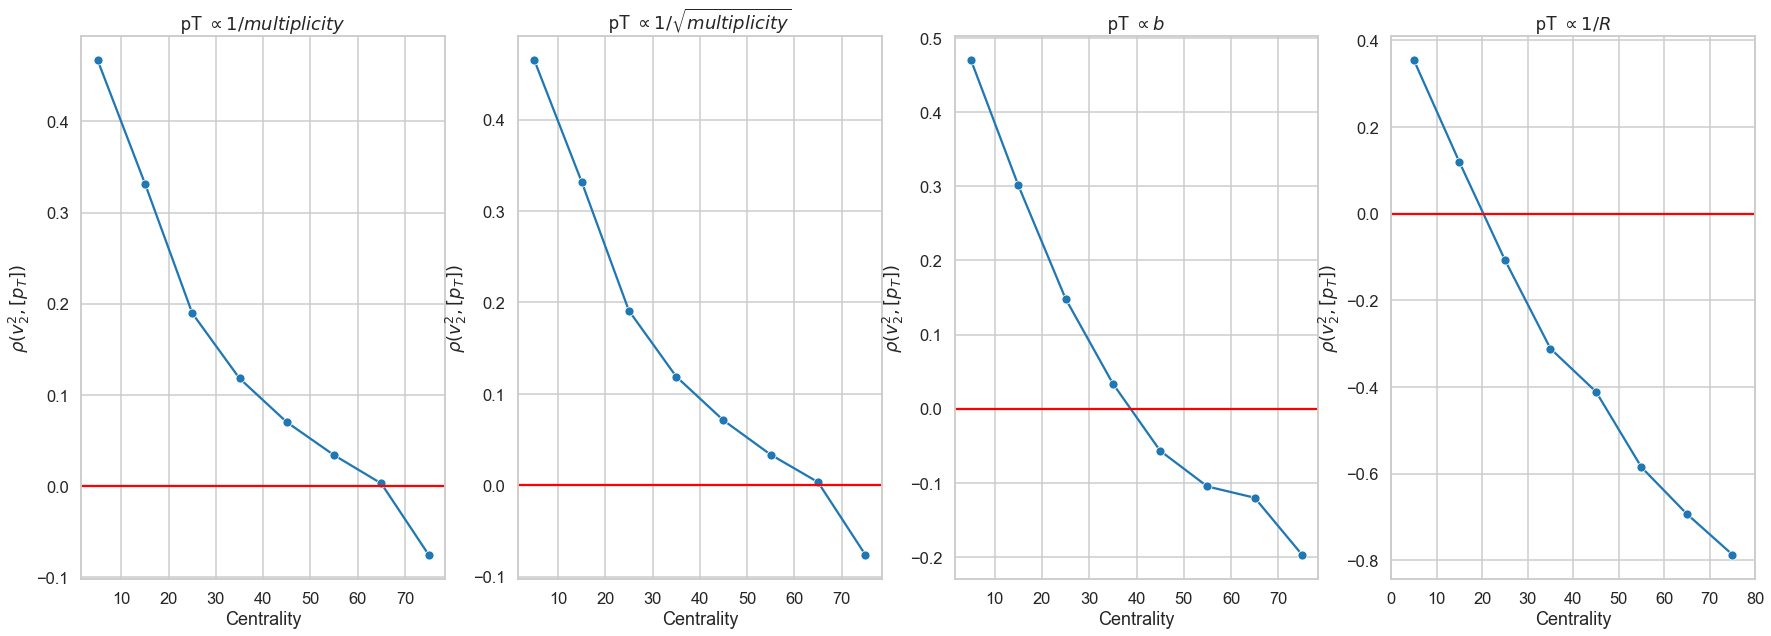

In [24]:
fig, axs = plt.subplots(1,4, figsize=(30,10),sharex=True, sharey=False)
sns.set_style('whitegrid')
sns.set_context('talk')
for i, ax in enumerate(axs):
    rho = calculate_rho(i)
    cen_array = [((mn+mx)/2) for mn,mx in cent_classe]
    sns.lineplot(x=cen_array, y=rho, marker="o",ax=ax)
    ax.axhline(color='r')
    ax.set_title(pT_methods[i])
    ax.set_xticks([0,10,20,30,40,50,60,70,80])
    #ax.set_xticklabels([0,10,20,30,40,50,60,70,80])
    ax.set_xlabel('Centrality')
    ax.set_ylabel(r'$\rho(v_2^{2},[p_T])$')